In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

# machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from calidad_datos import calidad_datos
from graficos import cross_plot

plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (8, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 70 # resolución gráficos
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### 1. Preparación ambiente de trabajo

In [6]:
data = pd.read_csv('southafricanheart.csv').drop('Unnamed: 0', axis=1)

In [7]:
# lista variables importadas
variables_ = data.columns
variables_

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [8]:
# analisis descriptivo
calidad_datos_ = calidad_datos(data)
calidad_datos_

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
sbp,int64,0,0.0,0,0.000000,462,NaN,NaN,NaN,138.327,20.4963,101,124,134,148,218,24,88,184,15
typea,int64,0,0.0,0,0.000000,462,NaN,NaN,NaN,53.1039,9.81753,13,47,53,60,78,13,27.5,79.5,4
age,int64,0,0.0,0,0.000000,462,NaN,NaN,NaN,42.816,14.609,15,31,45,55,64,24,-5,91,0
chd,int64,0,0.0,302,0.653680,462,NaN,NaN,NaN,0.34632,0.476313,0,0,0,1,1,1,-1.5,2.5,0
tobacco,float64,0,0.0,107,0.231602,462,NaN,NaN,NaN,3.63565,4.59302,0,0.0525,2,5.5,31.2,5.4475,-8.11875,13.6713,19
ldl,float64,0,0.0,0,0.000000,462,NaN,NaN,NaN,4.74032,2.07091,0.98,3.2825,4.34,5.79,15.33,2.5075,-0.47875,9.55125,14
adiposity,float64,0,0.0,0,0.000000,462,NaN,NaN,NaN,25.4067,7.7807,6.74,19.775,26.115,31.2275,42.49,11.4525,2.59625,48.4062,0
obesity,float64,0,0.0,0,0.000000,462,NaN,NaN,NaN,26.0441,4.21368,14.7,22.985,25.805,28.4975,46.58,5.5125,14.7163,36.7662,9
alcohol,float64,0,0.0,110,0.238095,462,NaN,NaN,NaN,17.0444,24.4811,0,0.51,7.51,23.8925,147.19,23.3825,-34.5637,58.9662,33
famhist,object,0,0.0,0,0.000000,462,2,Absent,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
data.describe().round(2)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00
mean,138.33,3.64,4.74,25.41,53.10,26.04,17.04,42.82,0.35
std,20.50,4.59,2.07,7.78,9.82,4.21,24.48,14.61,0.48
min,101.00,0.00,0.98,6.74,13.00,14.70,0.00,15.00,0.00
25%,124.00,0.05,3.28,19.77,47.00,22.98,0.51,31.00,0.00
50%,134.00,2.00,4.34,26.12,53.00,25.80,7.51,45.00,0.00
75%,148.00,5.50,5.79,31.23,60.00,28.50,23.89,55.00,1.00
max,218.00,31.20,15.33,42.49,78.00,46.58,147.19,64.00,1.00


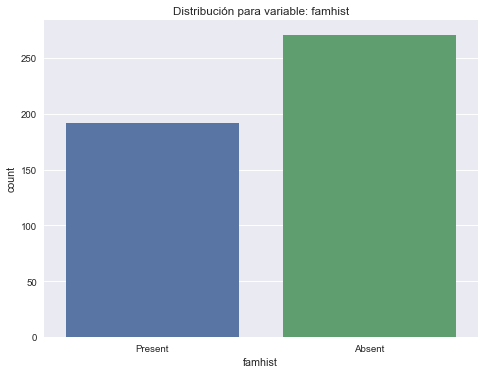

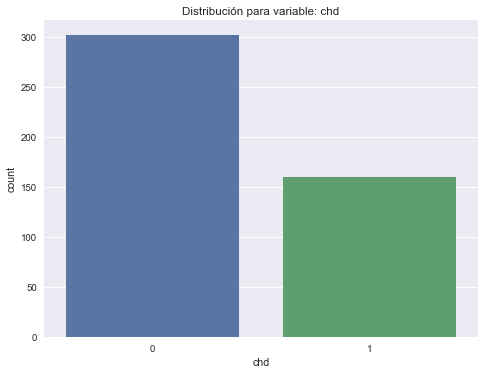

In [10]:
# distribucion de categorias para variables 'famhist' y 'chd'

for col in ['famhist', 'chd']:
    sns.countplot(data[col])
    plt.title(f'Distribución para variable: {col}')
    plt.show()

### 2. Estimación modelo

In [11]:
# recodificación variable famhist
data['famhist'] = data['famhist'].replace(['Absent', 'Present'], [0, 1])

In [12]:
# estimación modelo
model_1 = smf.logit('chd ~ famhist', data).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                 0.05740
Time:                        20:19:58   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist        1.1690      0.203      5.751      0.000       0.771       1.567
==============================================================================
"""

In [13]:
# mapeo log-odds a probabilidad

def inverse_logit(x):
    return 1 / (1 + np.exp(-x))

In [14]:
prob_famhist = inverse_logit(model_1.params['Intercept'] + model_1.params['famhist'] * 1) # 1 porque tiene antecedentes
prob_intercept = inverse_logit(model_1.params['Intercept'])

In [15]:
# preguntas
print(f'La probabilidad de tener una enfermedad es de {prob_famhist} cuando existe antecedentes familiares')
print(f"La probabilidad de tener una enfermedad es de {round(prob_intercept, 2)} cuando no existen antecedentes familiares")
print(f"Un individuo con antecedentes familiares tiene {round(prob_famhist - prob_intercept, 2)} mas de tener enfermedades cardiácas")

La probabilidad de tener una enfermedad es de 0.4999999999999999 cuando existe antecedentes familiares
La probabilidad de tener una enfermedad es de 0.24 cuando no existen antecedentes familiares
Un individuo con antecedentes familiares tiene 0.26 mas de tener enfermedades cardiácas


In [16]:
model_2 = smf.ols('chd ~ famhist', data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.66e-09
Time:                        20:19:58   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2370      0.028      8.489      0.000       0.182       0.292
famhist        0.2630      0.043      6.071      0.000       0.178       0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El coeficiente del modelo OLS es aproximadamente en magnitud una cuarta parte de los obtenidos por Logit.

### 3. Estimación completa

In [17]:
data.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [18]:
model_3 = smf.logit('chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age', data).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                  0.2080
Time:                        20:19:58   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp            0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco        0.0794      0.027      2.984      0.003       0.027       0.132
ldl            0.1739      0.060      2.915      0.004       0.057       0.291
adiposity      0.0186      0.029      0.635      0.526      -0.039       0.076
famhist        0.9254      0.228      4.061      0.000       0.479       1.372
typea          0.0396      0.012      3.214      0.001       0.015       0.064
obesity       -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol        0.0001      0.004      0.027      0.978      -0.009       0.009
age            0.0452      0.012      3.728      0.000       0.021       0.069
==============================================================================
"""

In [19]:
# mantenemos variables significativas
model_4 = smf.logit('chd ~ tobacco + ldl + famhist + typea + age', data).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                  0.2020
Time:                        20:19:58   Log-Likelihood:                -237.84
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.554e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4464      0.921     -7.000      0.000      -8.251      -4.642
tobacco        0.0804      0.026      3.106      0.002       0.030       0.131
ldl            0.1620      0.055      2.947      0.003       0.054       0.270
famhist        0.9082      0.226      4.023      0.000       0.466       1.351
typea          0.0371      0.012      3.051      0.002       0.013       0.061
age            0.0505      0.010      4.944      0.000       0.030       0.070
==============================================================================
"""

Mejora la interpretación de las variables mantenidas pero los estadísticos de bondad de ajuste varían levemente.

In [20]:
log_odds = model_4.params['Intercept'] + \
        model_4.params['tobacco'] + \
        model_4.params['ldl'] + \
        model_4.params['famhist'] + \
        model_4.params['typea'] + \
        model_4.params['age']

In [21]:

log_odds

-5.2083266882260375

Es mejor generar una explicación en base al efecto de cada variable sobre la variable explicativa.

### 4. Estimación de perfiles

In [22]:
def predict_proba(model=model_4, **values):
    values = pd.Series(values)
    log_odds = sum(model.params*pd.Series(values))
    prob = inverse_logit(log_odds)
    return prob

#### 4.1

In [23]:
# características similares a la muestra
# utilizar los valores promedios

prob_profile_mean = predict_proba(Intercept=1,
                            tobacco = data['tobacco'].mean(),
                            ldl = data['ldl'].mean(),
                            famhist = data['famhist'].mean(),
                            typea = data['typea'].mean(),
                            age = data['age'].mean()
                            )

#### 4.2

In [24]:
# características similares a la muestra
# utilizar valores altos (percentil 80? 100?)

high = 0.8
prob_profile_high = predict_proba(Intercept=1,
                            tobacco = data['tobacco'].mean(),
                            ldl = data['ldl'].quantile(high),
                            famhist = data['famhist'].mean(),
                            typea = data['typea'].mean(),
                            age = data['age'].mean()
                            )

#### 4.3

In [25]:
# características similares a la muestra
# utilizar valores bajos (percentil 0? 20?)

low = 0.2
prob_profile_low = predict_proba(Intercept=1,
                            tobacco = data['tobacco'].mean(),
                            ldl = data['ldl'].quantile(low),
                            famhist = data['famhist'].mean(),
                            typea = data['typea'].mean(),
                            age = data['age'].mean()
                            )

In [26]:
prob_profile_mean, prob_profile_high, prob_profile_low

(0.29370927481586945, 0.34275863459388867, 0.2418602897627156)

### Test KS

Cuando tenemos una variable binaria y queremos analizar que tan bueno es el ajuste.

In [27]:
from scipy.stats import ks_2samp

# KS: mide la distancia entre dos curvas (test kolmogorov-smirnoff)

def ks_statistic(df, var_obj, cols):
    ks = []
    for v in cols:
        ks_i = ks_2samp(df.loc[df[var_obj] == 1, v], df.loc[df[var_obj] == 0, v]).statistic
        ks.append(ks_i)
    
    data_ks = pd.DataFrame({'var':cols, 'ks':ks})
    return data_ks.sort_values('ks', ascending=False)

In [28]:
var_obj = 'chd'
cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

ks_statistic(data, var_obj, cols)

,var,ks
8,age,0.350538
1,tobacco,0.309230
4,famhist,0.282119
2,ldl,0.257781
3,adiposity,0.233113
0,sbp,0.166680
6,obesity,0.131705
7,alcohol,0.099627
5,typea,0.092177
